1).Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.


 2).Hypothesis Generation
 
 The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn as sns
import seaborn as sn


Loading Data

In [2]:
BigmartData=pd.read_csv('D:\DataScienceProjects\Big-Mart-Sales-Prediction\Test.csv')
#BigmartData

EDA

understanding Data

In [3]:
BigmartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
BigmartData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [5]:
BigmartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
BigmartData.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
BigmartData.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

Finding Duplicate values

In [8]:
BigmartData.duplicated().sum()

0

visulization

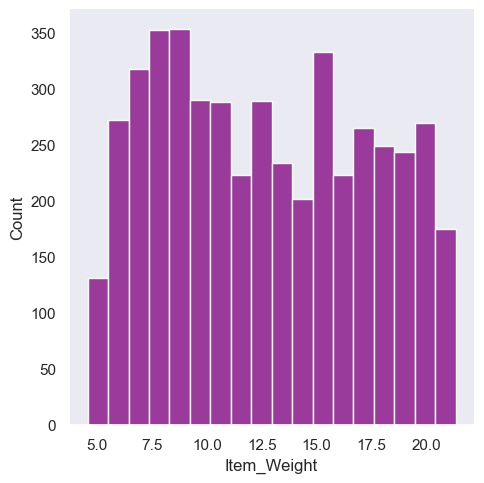

In [9]:
sn.set(style='dark',)
plot = sn.displot(BigmartData['Item_Weight'],color='purple')
plt.show()

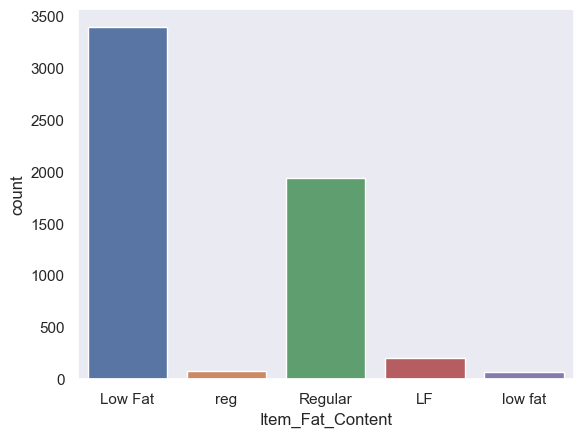

In [10]:
sn.set(style='dark',)
plot = sn.countplot(x='Item_Fat_Content', data=BigmartData)
plt.show()

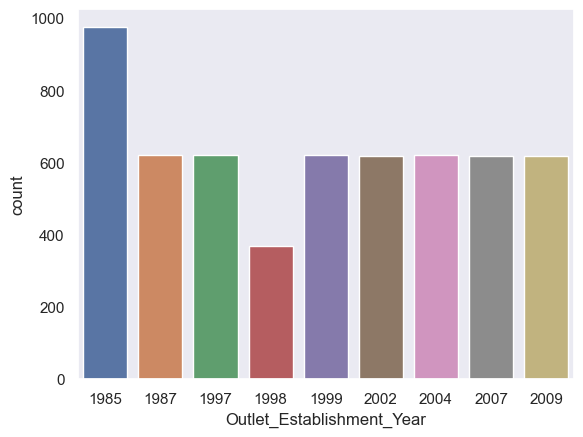

In [11]:
sn.set(style='dark',)
plot = sn.countplot(x='Outlet_Establishment_Year', data=BigmartData)
plt.show()

Finging Null Values

In [12]:
BigmartData.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Mean of Item Weight

In [13]:
#calculating mean of 'Item_Weight'
BigmartData['Item_Weight'].mean()

12.695633368756642

In [14]:
BigmartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Handling Null Values

In [15]:
#handling values by mean
BigmartData['Item_Weight'].fillna(BigmartData['Item_Weight'].mean(), inplace=True)

In [16]:
#BigmartData.head()

In [17]:
BigmartData.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
BigmartData['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [19]:
#filling most repeted value
BigmartData.Outlet_Size = BigmartData.Outlet_Size.fillna('Medium')
BigmartData['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [20]:
BigmartData.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [21]:
BigmartData['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [22]:
#rplacing LF and low fat & rg
BigmartData.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [23]:
BigmartData['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [25]:
# #Item type combine:
BigmartData['Item_Identifier'].value_counts()
BigmartData['Item_Type_Combined'] = BigmartData['Item_Identifier'].apply(lambda x: x[0:2])
BigmartData['Item_Type_Combined'] = BigmartData['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
BigmartData['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64